In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
class FFN(nn.Module):
    def __init__(self, N_INPUT, N_OUTPUT, N_HIDDEN):
        super().__init__()
        activation = nn.Tanh
        self.ffni = nn.Sequential(nn.Linear(N_INPUT, N_HIDDEN), activation())
        self.ffnh = nn.Sequential(nn.Linear(N_HIDDEN, N_HIDDEN), activation())
        self.ffne = nn.Sequential(nn.Linear(N_HIDDEN, N_OUTPUT))

    def forward(self, x):
        x = self.ffni(x)
        x = self.ffnh(x)
        x = self.ffnh(x)
        x = self.ffnh(x)
        x = self.ffne(x)
        return x

In [49]:
# #creation of general points with different time

# Nx = 11
# Ny = 11
# Nt = 11
# Lx = 1
# Ly = 1
# t_max = 1

# x = np.linspace(0, Lx, Nx)
# y = np.linspace(0, Ly, Ny)
# t = np.linspace(0, t_max, Nt)

# X, Y, time = np.meshgrid(x, y, t)
# x_col = torch.tensor(X.flatten(), dtype=torch.float32).unsqueeze(1)
# y_col = torch.tensor(Y.flatten(), dtype=torch.float32).unsqueeze(1)
# time_col = torch.tensor(time.flatten(), dtype = torch.float32).unsqueeze(1)

# print(x_col.size())
# print(y_col.size())
# print(time_col.size())

# # print(torch.cat([x_col,y_col,time_col], dim = 1))

In [50]:
# #creation of boundary points with different time

# Nx = 11
# Ny = 11
# Nt = 11
# Lx = 1
# Ly = 1
# t_max = 1

# y_left = torch.linspace(0, Ly, Ny)  # Ny points along y
# t_left = torch.linspace(0, t_max, Nt)  # Nt points in time

# # Repeat y for all time steps
# y_left = y_left.repeat_interleave(Nt)  # Each y repeated Nt times

# # Repeat t for all spatial points
# t_left = t_left.tile(Ny)  # Cycle t Ny times

# # x remains zero for the left boundary
# x_left = torch.zeros_like(y_left)

# x_col_left = torch.tensor(x_left.flatten(), dtype=torch.float32).unsqueeze(1)
# y_col_left = torch.tensor(y_left.flatten(), dtype=torch.float32).unsqueeze(1)
# t_col_left = torch.tensor(t_left.flatten(), dtype=torch.float32).unsqueeze(1)

# print(x_col_left.size())
# print(y_col_left.size())
# print(t_col_left.size())

# # print(torch.cat([x_col_left,y_col_left,t_col_left], dim = 1))

In [51]:
# #creation of initial points with time = 0

# Nx = 11
# Ny = 11
# Lx = 1
# Ly = 1

# tame = torch.zeros(Nx * Ny, 1)
# x = np.linspace(0, Lx, Nx)
# y = np.linspace(0, Ly, Ny)

# ex, uy = np.meshgrid(x,y)
# EX = torch.tensor(ex.flatten(), dtype=torch.float32).unsqueeze(1)
# UY = torch.tensor(uy.flatten(), dtype=torch.float32).unsqueeze(1)

# print(EX.size())
# print(UY.size())
# print(tame.size())

# # print(torch.cat([EX,UY,tame], dim = 1))

In [52]:
# Generate Domain and Boundary Points
def generate_points(Nx, Ny, Nt, Lx, Ly, t_max):
    
    # Interior points
    x = np.linspace(0, Lx, Nx)
    y = np.linspace(0, Ly, Ny)
    t = np.linspace(0, t_max, Nt)

    X, Y, time = np.meshgrid(x, y, t)
    x_col = torch.tensor(X.flatten(), dtype=torch.float32).unsqueeze(1)
    y_col = torch.tensor(Y.flatten(), dtype=torch.float32).unsqueeze(1)
    time_col = torch.tensor(time.flatten(), dtype = torch.float32).unsqueeze(1)

    # making of intital time

    ex,uy = np.meshgrid(x,y)
    EX = torch.tensor(ex.flatten(), dtype=torch.float32).unsqueeze(1)
    UY = torch.tensor(uy.flatten(), dtype=torch.float32).unsqueeze(1)


    # Boundary points of coordinates
    # Generate spatial (y) and temporal (t) points
    y_left = torch.linspace(0, Ly, Ny)  # Ny points along y
    t_left = torch.linspace(0, t_max, Nt)  # Nt points in time
    
    # Repeat y for all time steps
    y_left = y_left.repeat_interleave(Nt)  # Each y repeated Nt times
    
    # Repeat t for all spatial points
    t_left = t_left.tile(Ny)  # Cycle t Ny times
    
    # x remains zero for the left boundary
    x_left = torch.zeros_like(y_left)
    
    x_col_left = torch.tensor(x_left.flatten(), dtype=torch.float32).unsqueeze(1)
    y_col_left = torch.tensor(y_left.flatten(), dtype=torch.float32).unsqueeze(1)
    t_col_left = torch.tensor(t_left.flatten(), dtype=torch.float32).unsqueeze(1)
    
    
    #right
    
    # Generate spatial (y) and temporal (t) points
    y_right = torch.linspace(0, Ly, Ny)  # Ny points along y
    t_right = torch.linspace(0, t_max, Nt)  # Nt points in time
    
    # Repeat y for all time steps
    y_right = y_right.repeat_interleave(Nt)  # Each y repeated Nt times
    
    # Repeat t for all spatial points
    t_right = t_right.tile(Ny)  # Cycle t Ny times
    
    # x remains zero for the left boundary
    x_right = Lx * torch.ones_like(y_right)
    
    x_col_right = torch.tensor(x_right.flatten(), dtype=torch.float32).unsqueeze(1)
    y_col_right = torch.tensor(y_right.flatten(), dtype=torch.float32).unsqueeze(1)
    t_col_right = torch.tensor(t_right.flatten(), dtype=torch.float32).unsqueeze(1)
    
    
    # top 
    
    # Generate spatial (y) and temporal (t) points
    x_top = torch.linspace(0, Lx, Nx)  # Ny points along y
    t_top = torch.linspace(0, t_max, Nt)  # Nt points in time
    
    # Repeat y for all time steps
    x_top = x_top.repeat_interleave(Nt)  # Each y repeated Nt times
    
    # Repeat t for all spatial points
    t_top = t_top.tile(Nx)  # Cycle t Ny times
    
    # x remains zero for the left boundary
    y_top = Ly * torch.ones_like(x_top)
    
    x_col_top = torch.tensor(x_top.flatten(), dtype=torch.float32).unsqueeze(1)
    y_col_top = torch.tensor(y_top.flatten(), dtype=torch.float32).unsqueeze(1)
    t_col_top = torch.tensor(t_top.flatten(), dtype=torch.float32).unsqueeze(1)
    
    
    # bottom
    
    # Generate spatial (y) and temporal (t) points
    x_bottom = torch.linspace(0, Lx, Nx)  # Ny points along y
    t_bottom = torch.linspace(0, t_max, Nt)  # Nt points in time
    
    # Repeat y for all time steps
    x_bottom = x_bottom.repeat_interleave(Nt)  # Each y repeated Nt times
    
    # Repeat t for all spatial points
    t_bottom = t_bottom.tile(Nx)  # Cycle t Ny times
    
    # x remains zero for the left boundary
    y_bottom = torch.zeros_like(x_bottom)
    
    x_col_bottom = torch.tensor(x_bottom.flatten(), dtype=torch.float32).unsqueeze(1)
    y_col_bottom = torch.tensor(y_bottom.flatten(), dtype=torch.float32).unsqueeze(1)
    t_col_bottom = torch.tensor(t_bottom.flatten(), dtype=torch.float32).unsqueeze(1)
    
    

    # initial points of time
    tame = torch.zeros(Nx*Ny,1)
    initial_condition = (EX, UY, tame, 100)

    boundaries = [
        (x_col_left, y_col_left, t_col_left, 100),     # Left boundary (0°C)
        (x_col_right, y_col_right, t_col_right, 0),   # Right boundary (0°C)
        (x_col_bottom, y_col_bottom, t_col_bottom, 0), # Bottom boundary (0°C)
        (x_col_top, y_col_top, t_col_top, 100)      # Top boundary (100°C)
    ]

    return (x_col, y_col, time_col), boundaries, initial_condition

In [53]:
# PDE Residual Loss
def pde_residual_loss(model, x, y, t):
    x.requires_grad = True
    y.requires_grad = True
    t.requires_grad = True
    
    T = model(torch.cat([x, y, t], dim=1))  # Neural network prediction T(x, y)
    
    # First derivatives of time
    T_t = torch.autograd.grad(T, t, grad_outputs=torch.ones_like(T), create_graph=True)[0] #dT/dt
    

    # First derivatives wrt x, y
    grad_T = torch.autograd.grad(T, [x, y], grad_outputs=torch.ones_like(T), create_graph=True)
    T_x, T_y = grad_T[0], grad_T[1]  # dT/dx, dT/dy

    # Second derivatives
    T_xx = torch.autograd.grad(T_x, x, grad_outputs=torch.ones_like(T_x), create_graph=True)[0]
    T_yy = torch.autograd.grad(T_y, y, grad_outputs=torch.ones_like(T_y), create_graph=True)[0]

    # Residual of Laplace's equation
    residual = T_t - 0.1*(T_xx + T_yy)  # ∂T/∂t - k(∂²T/∂x² + ∂²T/∂y²)

    loss_residual = torch.mean(residual**2)
    return loss_residual

# Boundary Loss
def boundary_loss(model, x_boundary, y_boundary, time_boundary, T_exact):
    T_pred = model(torch.cat([x_boundary, y_boundary, time_boundary], dim=1)) 
    loss_boundary = torch.mean((T_pred - T_exact)**2)
    return loss_boundary

# def intial_loss(model, x, y):
def initial_loss(model, x_initial, y_initial, t_initial, T_exact):
    T_pred = model(torch.cat([x_initial, y_initial, t_initial], dim = 1))
    loss_initial = torch.mean((T_pred - T_exact)**2)
    return loss_initial
    

# Total Loss Function
def total_loss(model, collocation_points, boundaries, initial_condition):
    # PDE Residual Loss
    x_col, y_col, t_col = collocation_points
    loss_pde = pde_residual_loss(model, x_col, y_col, t_col)

    # Boundary Losses
    loss_boundary = 0
    for boundary in boundaries:
        x_b, y_b, t_b, T_exact_val = boundary
        T_exact = T_exact_val * torch.ones_like(x_b)
        loss_boundary += boundary_loss(model, x_b, y_b, t_b, T_exact)
        
    # Initial loss 
    x_init, y_init, t_init, T_init_val = initial_condition
    T_exact_init = T_init_val * torch.ones_like(x_init)
    loss_initial = initial_loss(model,x_init, y_init, t_init, T_exact_init)
    
    # Combine losses
    total_loss = 10*loss_pde + 100*loss_boundary + 1E3*loss_initial
    return total_loss

In [54]:
# ### chekcing up main funtion

# Lx, Ly = 1.0, 1.0   # Domain dimensions
# t = 1
# Nx, Ny = 11, 11     # Number of points in x and y directions
# Nt = 11
# hidden_dim = 20     # Hidden layer size
# epochs = 5000       # Number of training epochs
# lr = 1e-3           # Learning rate

# # Generate points
# collocation_points, boundaries, time_initial = generate_points(Nx, Ny, Nt, Lx, Ly, t)

# # Model and Optimizer
# # model = FFN(2, 1, hidden_dim)
# model = FFN(3, 1, hidden_dim) # 2 -> 3
# optimizer = optim.Adam(model.parameters(), lr=lr)

# # Training Loop
# losses = []
# x = torch.linspace(0, Lx, Nx)
# y = torch.linspace(0, Ly, Ny)
# t = torch.linspace(0, t, Nt)
# X, Y, Time  = torch.meshgrid(x, y, t) # 11x11x11; reshape in plot_temperature

# ### checking up the prediciton for plotting purpose 
# x_flat = X.reshape(-1, 1)
# y_flat = Y.reshape(-1, 1)
# time_flat = Time.reshape(-1, 1)

# torch.set_printoptions(threshold=10_000)

# T_pred = model(torch.cat([x_flat, y_flat, time_flat], dim=1))
# # print(T_pred)
# T_pred = model(torch.cat([x_flat, y_flat, time_flat], dim=1)).reshape(Nt, Nx, Ny)

# # print(T_pred)

# # T_pred = T_pred.reshape(Nt, Nx, Ny)
# T_pred_t = T_pred[Nt-1, :, :]
# print(T_pred_t)


In [55]:
# # Initialization
# Lx = Ly = Lt = 1
# Nx = Ny = Nt = 11

# x = torch.linspace(0, Lx, Nx)
# y = torch.linspace(0, Ly, Ny)
# t = torch.linspace(0, Lt, Nt)

# X, Y = torch.meshgrid(x, y, indexing="ij")  # Spatial grid
# x_col = X.flatten().unsqueeze(1)  # Flatten for model input
# y_col = Y.flatten().unsqueeze(1)

# dt = t[1] - t[0]  # Time step size
# print(t[0], t[1], t[2])
# # Loop through time steps
# for i in range(Nt):
#     # Create the time column for this step
#     tame = t[i] * torch.ones_like(x_col)  # Time value for all points

#     # Predict temperature values using the model
#     with torch.no_grad():
#         T_pred = model(torch.cat([x_col, y_col, tame], dim=1)).reshape(Nx, Ny)

#     # Plot temperature distribution
#     plt.figure(figsize=(8, 6))
#     plt.contourf(X.numpy(), Y.numpy(), T_pred.numpy(), cmap="jet", levels=60)
#     plt.colorbar(label="Temperature (°C)")
#     plt.title(f"Temperature Distribution at Time {t[i].item():.2f}")
#     plt.xlabel("x")
#     plt.ylabel("y")
#     plt.show()


In [56]:
## import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML, display
import torch

# Plot function
def plot(model, Lx, Ly, Lt, Nx, Ny, Nt):
    x = torch.linspace(0, Lx, Nx)
    y = torch.linspace(0, Ly, Ny)
    t = torch.linspace(0, Lt, Nt)

    X, Y = torch.meshgrid(x, y, indexing="ij")  # Spatial grid
    x_col = X.flatten().unsqueeze(1)  # Flatten for model input
    y_col = Y.flatten().unsqueeze(1)

    # Create figure and axis for animation
    fig, ax = plt.subplots(figsize=(6, 4))
    time_text = ax.text(0.5, 1.05, '', transform=ax.transAxes, ha='center', fontsize=14)

    # Initialize the plot
    def init():
        ax.contourf(X.numpy(), Y.numpy(), torch.zeros((Nx, Ny)).numpy(), cmap="jet", levels=60)
        ax.set_title("Temperature Distribution Over Time")
        ax.set_xlabel("x")
        ax.set_ylabel("y")

    # Update function for animation
    def update(frame):
        t_frame = t[frame] * torch.ones_like(x_col)
        with torch.no_grad():
            T_pred = model(torch.cat([x_col, y_col, t_frame], dim=1)).reshape(Nx, Ny)
        ax.clear()
        ax.contourf(X.numpy(), Y.numpy(), T_pred.numpy(), cmap="jet", levels=60)
        time_text.set_text(f"Time: {t[frame].item():.2f}")
        return ax

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=Nt, init_func=init, blit=False)
    return ani

/tmp/ipykernel_1240566/2636432859.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_col_left = torch.tensor(x_left.flatten(), dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_1240566/2636432859.py:36: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_col_left = torch.tensor(y_left.flatten(), dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_1240566/2636432859.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  t_col_left = torch.tensor(t_left.flatten(), dtype=torch.float32).unsqueeze(1)
/tmp/ipykernel_1240566/2636432859.py:55: UserWarn

Epoch 0, Loss: 12026344.000000


Epoch 200, Loss: 4527765.500000


Epoch 400, Loss: 2262640.000000


Epoch 600, Loss: 1780302.750000


Epoch 800, Loss: 1718900.625000


Epoch 1000, Loss: 530455.187500


Epoch 1200, Loss: 347314.125000


Epoch 1400, Loss: 311743.437500


Epoch 1600, Loss: 300469.062500


Epoch 1800, Loss: 281710.625000


Epoch 1999, Loss: 276103.156250


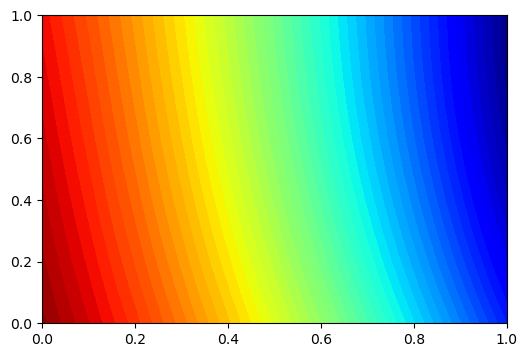

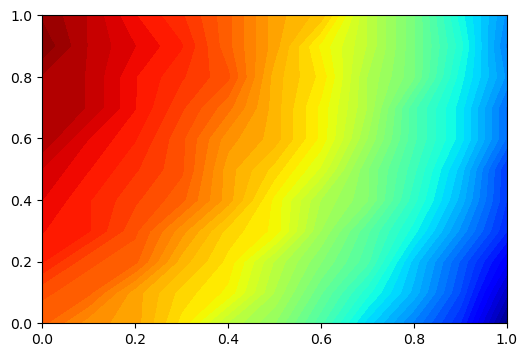

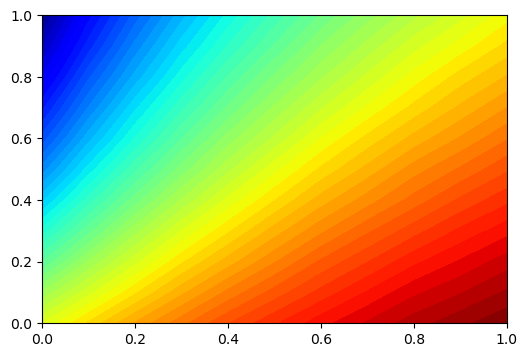

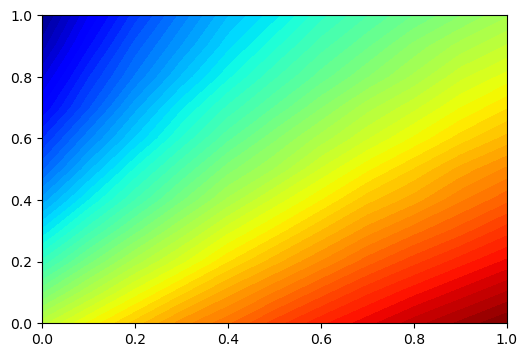

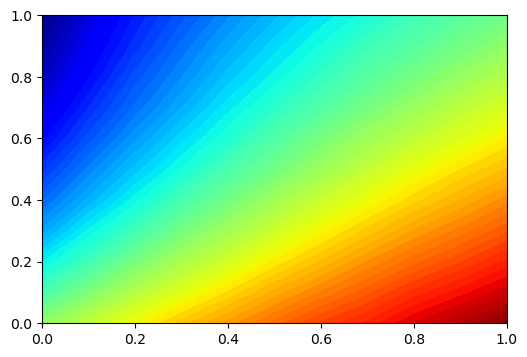

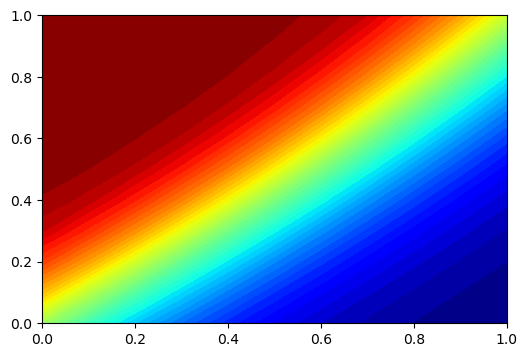

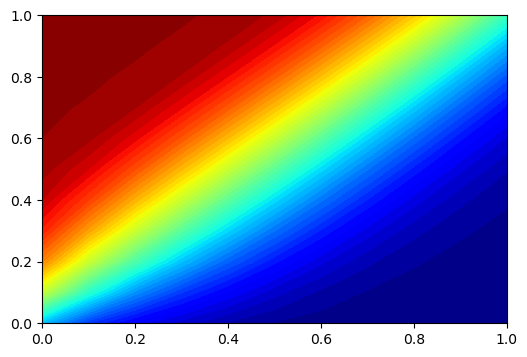

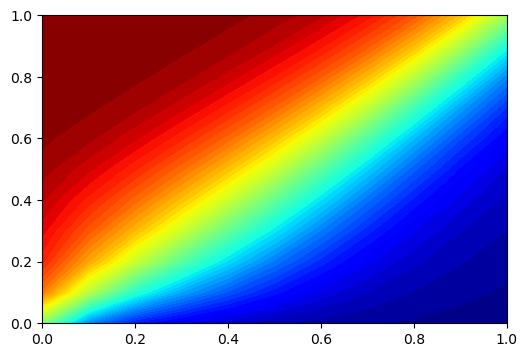

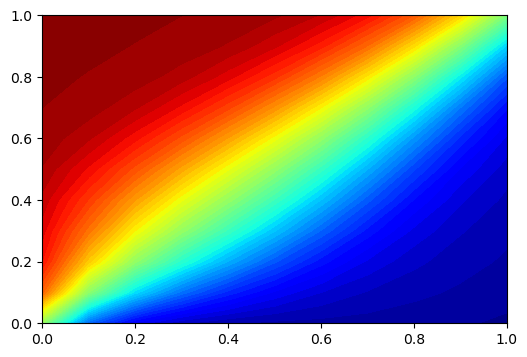

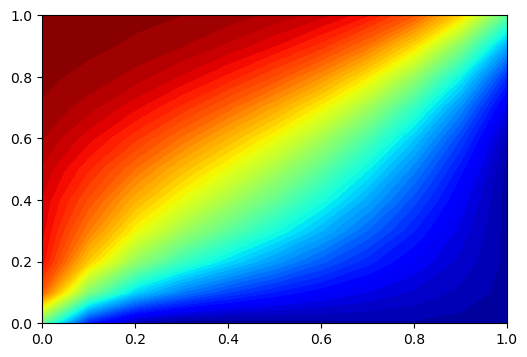

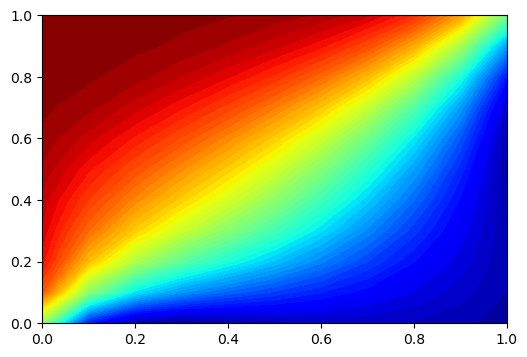

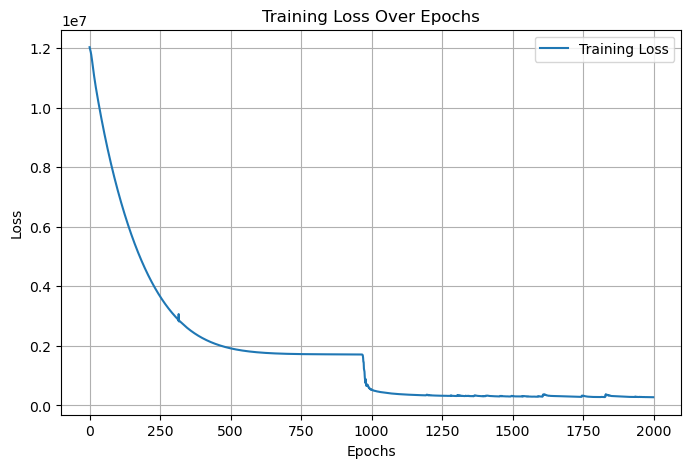

In [57]:
# Main function
def main():
    # Parameters
    Lx, Ly = 1.0, 1.0   # Domain dimensions
    Lt = 5
    Nx, Ny = 11, 11     # Number of points in x and y directions
    Nt = 11
    hidden_dim = 20     # Hidden layer size
    epochs = 2000       # Number of training epochs
    lr = 1e-2           # Learning rate

    # Generate points
    collocation_points, boundaries, time_initial = generate_points(Nx, Ny, Nt, Lx, Ly, Lt)

    # Model and Optimizer
    model = FFN(3, 1, hidden_dim)  # 3 input dimensions: x, y, time
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    # Training Loop
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = total_loss(model, collocation_points, boundaries, time_initial)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if epoch % 200 == 0 or epoch == epochs - 1:
            print(f"Epoch {epoch}, Loss: {loss.item():.6f}")
            ani = plot(model, Lx, Ly, Lt, Nx, Ny, Nt)
            display(HTML(ani.to_jshtml()))

    torch.save(model.state_dict(), "2D_Heat")

    # Final Loss Plot
    plt.figure(figsize=(8, 5))
    plt.plot(losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Epochs')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__":
    main()